# Import Libraries

In [1]:
# main libraries
import numpy as np
import pandas as pd

# visual libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [2]:
import os
os.listdir()

['.ipynb_checkpoints', 'decisiontree1.png', 'Heart Disease.ipynb', 'heart.csv']

# Read Data

In [3]:
data= pd.read_csv('heart.csv')

In [4]:
data.info()
"""
age -> age in years -numerical
sex(1 = male; 0 = female) -nominal
cp -> chest pain type -ordinal
trestbps -> resting blood pressure (in mm Hg on admission to the hospital) -numerical
chol -> serum cholestoral in mg/dl -numerical
fbs -> (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) -nominal
restecg -> resting electrocardiographic results -> nominal
thalach -> maximum heart rate achieved -numerical
exang -> exercise induced angina (1 = yes; 0 = no) -nominal
oldpeak -> ST depression induced by exercise relative to rest -numerical
slope -> the slope of the peak exercise ST segment -ordinal
ca -> number of major vessels (0-3) colored by flourosopy -ordinal
thal -> 3 = normal; 6 = fixed defect; 7 = reversable defect -ordinal
target -> 1 or 0 -nominal


"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


'\nage -> age in years -numerical\nsex(1 = male; 0 = female) -nominal\ncp -> chest pain type -ordinal\ntrestbps -> resting blood pressure (in mm Hg on admission to the hospital) -numerical\nchol -> serum cholestoral in mg/dl -numerical\nfbs -> (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) -nominal\nrestecg -> resting electrocardiographic results -> nominal\nthalach -> maximum heart rate achieved -numerical\nexang -> exercise induced angina (1 = yes; 0 = no) -nominal\noldpeak -> ST depression induced by exercise relative to rest -numerical\nslope -> the slope of the peak exercise ST segment -ordinal\nca -> number of major vessels (0-3) colored by flourosopy -ordinal\nthal -> 3 = normal; 6 = fixed defect; 7 = reversable defect -ordinal\ntarget -> 1 or 0 -nominal\n\n\n'

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.isnull().sum() #checking null values, there is no null values.

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.describe() #show basic statistical details 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


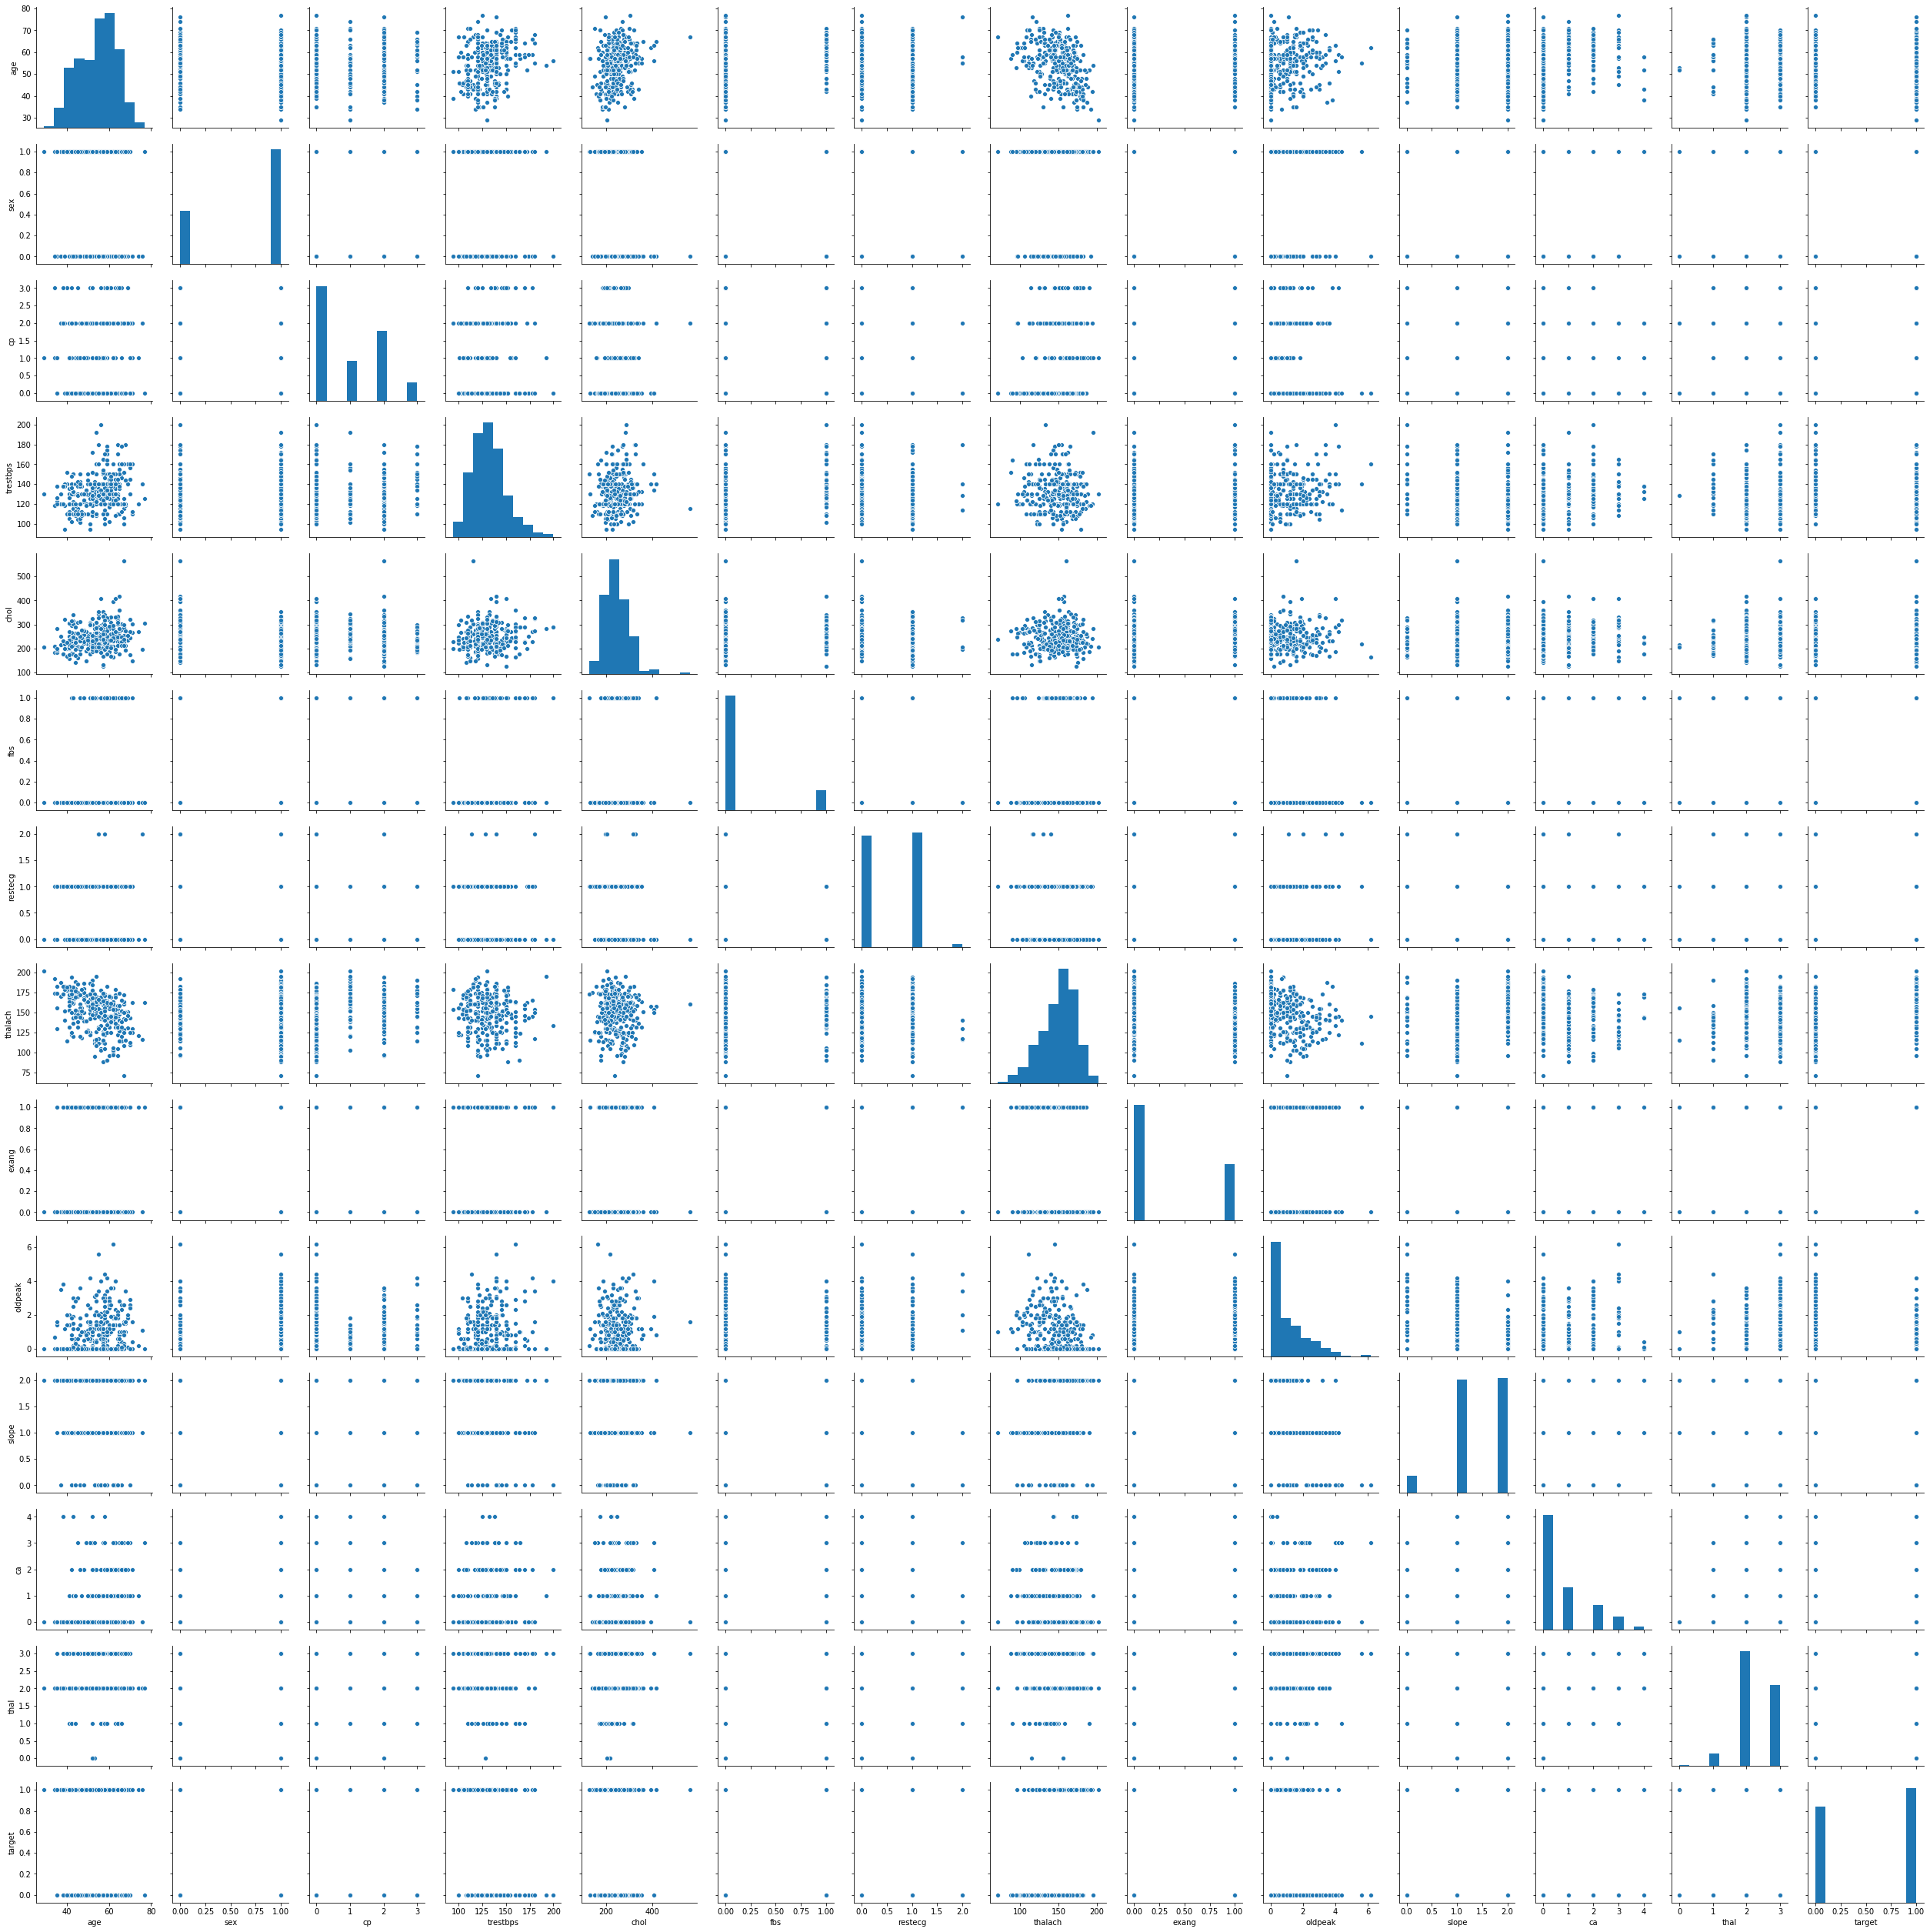

In [8]:
sns.pairplot(data) #Plot pairwise relationships in a dataset.

### Heatmap

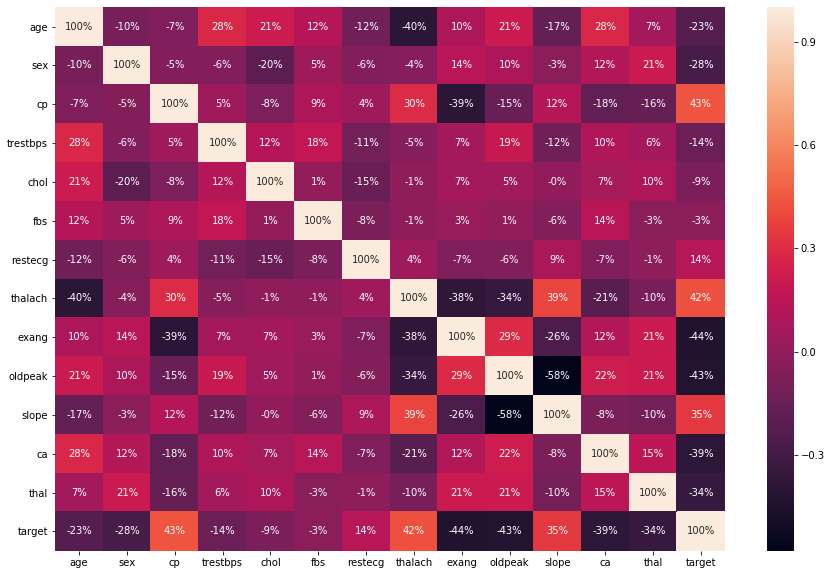

In [9]:
#visualize the correlation
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True,fmt=".0%")
plt.show() 
#thalach, cp and slope are the most correlated features with target. However, these are only individual correlation. 

### Age Distrubition

Text(0, 0.5, 'Frequency')

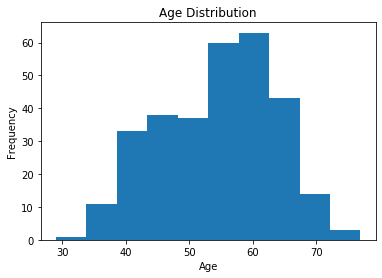

In [10]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(data['age'])
# set title and labels
ax.set_title('Age Distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')

#When we look at the age disturbution in the dataset, there are too many sample which ages are between 55-65 and least between 
# 30-40 and 70+ no sample which has less than 29 and bigger than 77  

In [11]:
data[data["age"].min() == data["age"]]["age"].iloc[0] #age is between 29 and 77

29

In [12]:
data[data["age"].max() == data["age"]]["age"].iloc[0]

77

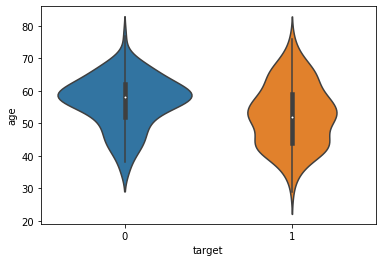

In [13]:
sns.violinplot(x='target', y='age', data=data) #in dataset samples which are not sick is crowded in age between 55-75

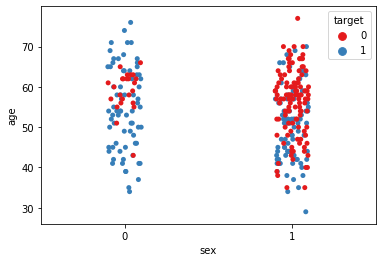

In [14]:
sns.stripplot(x="sex",y="age",data=data,jitter=True,hue='target',palette='Set1')
#in dataset samples which are male is bigger but number of people have disease ratio is bigger in female class.

### Sex Distrubition

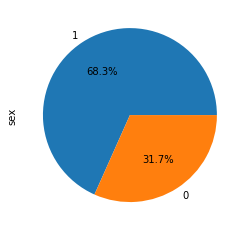

In [15]:
data['sex'].value_counts().plot.pie(autopct="%1.1f%%")

#sex 0 is female and 1 is male there are 96 females and 207 males in dataset

In [16]:
data['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

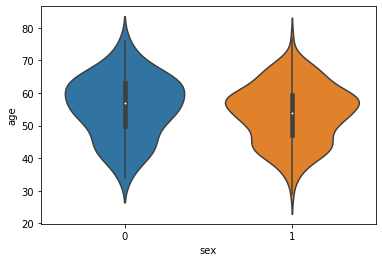

In [17]:
sns.violinplot(x='sex', y='age', data=data)

### Target

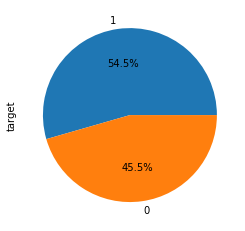

In [18]:
data['target'].value_counts().plot.pie(autopct="%1.1f%%") #data has more samples which are having disease

In [19]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

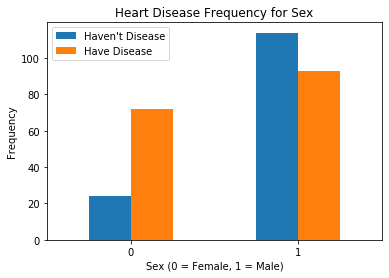

In [20]:
pd.crosstab(data.sex,data.target).plot(kind="bar")
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

#Almost 75% of females are sick in this dataset.

### Exang

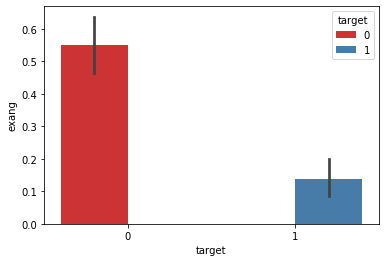

In [21]:
sns.barplot(x="target", y='exang', hue="target", data=data,palette='Set1')
#As seen in the figure number of not exercise angina samples are bigger.

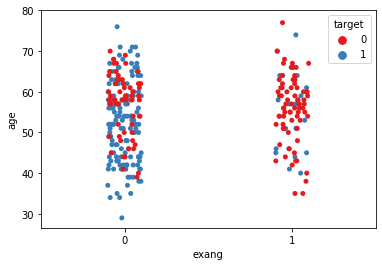

In [22]:
sns.stripplot(x="exang",y="age",data=data,jitter=True,hue='target',palette='Set1')
#in dataset samples which exang is 0 much bigger than 1, and if the sample experinced the angina, possibility of having disease is less than 0

### Ca

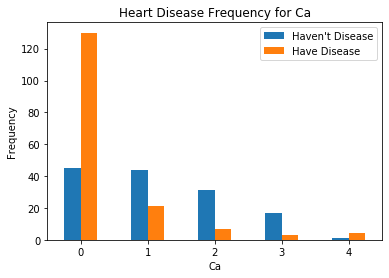

In [23]:
pd.crosstab(data.ca,data.target).plot(kind="bar")
plt.title('Heart Disease Frequency for Ca')
plt.xlabel('Ca')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

#if you have less vessels then probability of having disease is much bigger.

### Thal

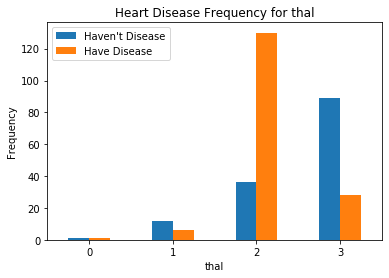

In [24]:
pd.crosstab(data.thal,data.target).plot(kind="bar")
plt.title('Heart Disease Frequency for thal')
plt.xlabel('thal')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

#it has a big risk if sample's thal value is 2

### Thalac

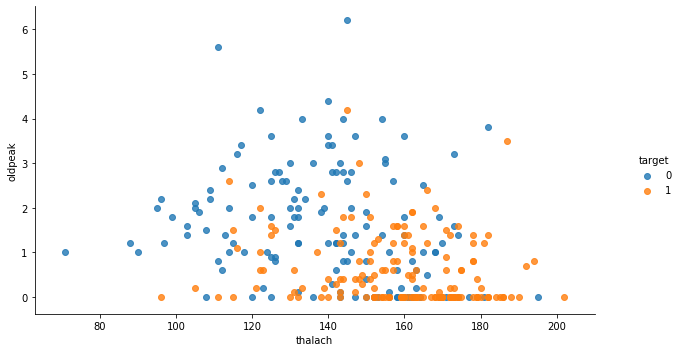

In [25]:
sns.lmplot('thalach', 'oldpeak', data, hue='target', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

#if oldpeak is bigger than 2, sample is most probably not having heart disease.

### Oldpeak

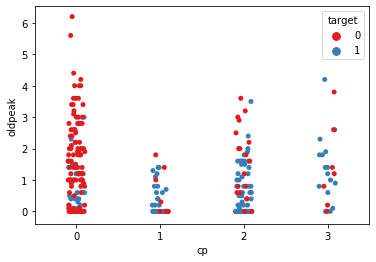

In [26]:
sns.stripplot(x="cp",y="oldpeak",data=data,jitter=True,hue='target',palette='Set1')
#data is crowded in cp 0. if oldpeak is bigger than 2.5, there is no big risk

### Cp

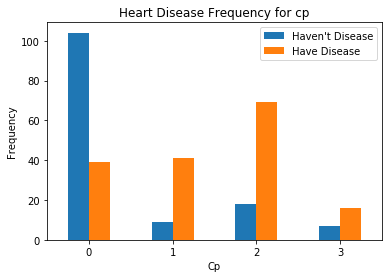

In [27]:
pd.crosstab(data.cp,data.target).plot(kind="bar")
plt.title('Heart Disease Frequency for cp')
plt.xlabel('Cp')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

#chance of having disease is
#less if sample has typical angina. Chance is getting higher when sample has non-anginal
#pain. However, since there are 87 values, it cannot be claimed that possibility of
#having disease on non-anginal has much bigger than atypical angina or asymptomatic.

In [28]:
data['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

# Select the Features

In [29]:
X = data.drop(['target'], axis=1) #Aim is to find whether have disease or not.label=target
y = data.target

In [30]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [31]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

# Feature Selection

In [32]:
#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(13,'Score'))

# According to Chi-squared thalach is the best feature. But in every model, it will use the best feature according to the models
#Chi-squared looks at the correlation between all features.

       Specs       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835
12      thal    5.791853
6    restecg    2.978271
5        fbs    0.202934


# Random Forest Classifier

[0.07389336 0.03507141 0.15291046 0.06147094 0.07267027 0.00777636
 0.02228827 0.09867379 0.06211808 0.10996918 0.05244091 0.13215294
 0.11856404]


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


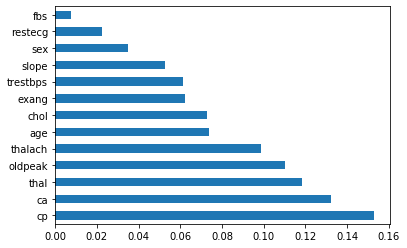

In [29]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier() 
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

#For random forest classifier cp, ca, oldpeak, thalach and age are the most important features.

In [30]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
best_features = SelectFromModel(RandomForestClassifier())
best_features.fit(X, y)

transformedX = best_features.transform(X)
print(f"Old Shape: {X.shape}, New shape: {transformedX.shape}")
#selected 7 best features

Old Shape: (303, 13), New shape: (303, 7)


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [31]:
transformedX 

array([[ 63. ,   3. , 233. , ...,   2.3,   0. ,   1. ],
       [ 37. ,   2. , 250. , ...,   3.5,   0. ,   2. ],
       [ 41. ,   1. , 204. , ...,   1.4,   0. ,   2. ],
       ...,
       [ 68. ,   0. , 193. , ...,   3.4,   2. ,   3. ],
       [ 57. ,   0. , 131. , ...,   1.2,   1. ,   3. ],
       [ 57. ,   1. , 236. , ...,   0. ,   1. ,   2. ]])

In [32]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [33]:
X.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2


In [34]:
# you may get same split every time by random state
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier


cv = KFold(n_splits=10, shuffle=True, random_state=42) 

accuracies = []
for train, test in cv.split(transformedX):
  model = RandomForestClassifier(criterion='entropy', n_estimators=1000, max_depth=4)
  model.fit(transformedX[train], y[train])

  scr = model.score(transformedX[test], y[test])
  accuracies.append(scr)

print(f"Mean of experiment scores: {np.mean(accuracies)}")

Mean of experiment scores: 0.8184946236559141


In [38]:
from sklearn.ensemble import RandomForestClassifier

parameters = [{'max_depth' : [1,2,3,4,5,6,7,8,9,10]}]
clf = RandomForestClassifier()
Grid1 = GridSearchCV(clf, parameters, cv=10)
Grid1.fit(transformedX, y)

Grid1.best_estimator_

scores = Grid1.cv_results_
scores['mean_test_score']

#best depth is 5

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: Future

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: Future

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: Future

array([0.83168317, 0.82178218, 0.80528053, 0.80528053, 0.78547855,
       0.79867987, 0.77887789, 0.81188119, 0.77557756, 0.81188119])

In [39]:
from sklearn.ensemble import RandomForestClassifier

parameters = [{'n_estimators': [1,10,100,1000],'criterion': ['gini', 'entropy']}]
clf = RandomForestClassifier()
Grid1 = GridSearchCV(clf, parameters, cv=10)
Grid1.fit(transformedX, y)

Grid1.best_estimator_

scores = Grid1.cv_results_
scores['mean_test_score']


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


array([0.71947195, 0.78877888, 0.79537954, 0.79207921, 0.74587459,
       0.77887789, 0.77887789, 0.78877888])

# Decision Tree 

[0.04588094 0.02245064 0.27026321 0.05572691 0.13071826 0.
 0.01862978 0.05774279 0.02708088 0.09310002 0.02620208 0.13947727
 0.11272723]


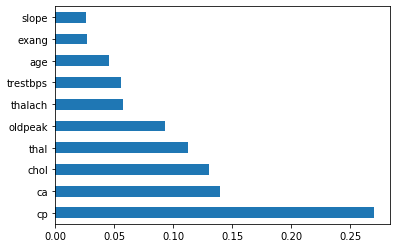

In [33]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#For decision tree classifier cp, ca, chol, thal and oldpeak are the most important features.

In [34]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
best_features = SelectFromModel(DecisionTreeClassifier())
best_features.fit(X, y)

transformedX = best_features.transform(X)
print(f"Old Shape: {X.shape}, New shape: {transformedX.shape}")
#new features size is 5

Old Shape: (303, 13), New shape: (303, 5)


In [35]:
# you may get same split every time by random state
from sklearn.model_selection import KFold


cv = KFold(n_splits=10, shuffle=True, random_state=42) 

accuracies = []
for train, test in cv.split(transformedX):
  model = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
  model.fit(transformedX[train], y[train])

  scr = model.score(transformedX[test], y[test])
  accuracies.append(scr)

print(f"Mean of experiment scores: {np.mean(accuracies)}")

Mean of experiment scores: 0.821720430107527


In [36]:
parameters = {'max_depth': range(1,10), 
              'min_samples_split': range(2,8), 
              'min_samples_leaf': range(2, 8)}

gcv = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10).fit(transformedX, y)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [44]:
pd.DataFrame(gcv.cv_results_)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\de

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001001,4.457845e-04,0.000400,0.000490,1,2,2,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.741935,0.806452,...,0.753676,0.761029,0.761029,0.761905,0.758242,0.754579,0.770073,0.755474,0.759071,0.004823
1,0.000898,2.993835e-04,0.000296,0.000452,1,2,3,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.741935,0.806452,...,0.753676,0.761029,0.761029,0.761905,0.758242,0.754579,0.770073,0.755474,0.759071,0.004823
2,0.000799,3.993412e-04,0.000598,0.000489,1,2,4,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.741935,0.806452,...,0.753676,0.761029,0.761029,0.761905,0.758242,0.754579,0.770073,0.755474,0.759071,0.004823
3,0.000899,8.316394e-04,0.000598,0.000662,1,2,5,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.741935,0.806452,...,0.753676,0.761029,0.761029,0.761905,0.758242,0.754579,0.770073,0.755474,0.759071,0.004823
4,0.000702,6.398972e-04,0.000402,0.000493,1,2,6,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.741935,0.806452,...,0.753676,0.761029,0.761029,0.761905,0.758242,0.754579,0.770073,0.755474,0.759071,0.004823
5,0.000399,4.883735e-04,0.000498,0.000498,1,2,7,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.741935,0.806452,...,0.753676,0.761029,0.761029,0.761905,0.758242,0.754579,0.770073,0.755474,0.759071,0.004823
6,0.000498,4.976102e-04,0.000204,0.000408,1,3,2,"{'max_depth': 1, 'min_samples_leaf': 3, 'min_s...",0.741935,0.806452,...,0.753676,0.761029,0.761029,0.761905,0.758242,0.754579,0.770073,0.755474,0.759071,0.004823
7,0.000296,4.527409e-04,0.000398,0.000488,1,3,3,"{'max_depth': 1, 'min_samples_leaf': 3, 'min_s...",0.741935,0.806452,...,0.753676,0.761029,0.761029,0.761905,0.758242,0.754579,0.770073,0.755474,0.759071,0.004823
8,0.000401,4.905356e-04,0.000298,0.000456,1,3,4,"{'max_depth': 1, 'min_samples_leaf': 3, 'min_s...",0.741935,0.806452,...,0.753676,0.761029,0.761029,0.761905,0.758242,0.754579,0.770073,0.755474,0.759071,0.004823
9,0.000502,5.021021e-04,0.000296,0.000452,1,3,5,"{'max_depth': 1, 'min_samples_leaf': 3, 'min_s...",0.741935,0.806452,...,0.753676,0.761029,0.761029,0.761905,0.758242,0.754579,0.770073,0.755474,0.759071,0.004823


In [37]:
transformedX #cp, chol, oldpeak, thal, ca

array([[  3. , 233. ,   2.3,   0. ,   1. ],
       [  2. , 250. ,   3.5,   0. ,   2. ],
       [  1. , 204. ,   1.4,   0. ,   2. ],
       ...,
       [  0. , 193. ,   3.4,   2. ,   3. ],
       [  0. , 131. ,   1.2,   1. ,   3. ],
       [  1. , 236. ,   0. ,   1. ,   2. ]])

In [46]:
X.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2


In [47]:
print(f"Best Estimator: {gcv.best_estimator_}")
print(f"Best Parameter: {gcv.best_params_}")
print(f"Best Score: {gcv.best_score_}")

Best Estimator: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Best Parameter: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score: 0.8316831683168316


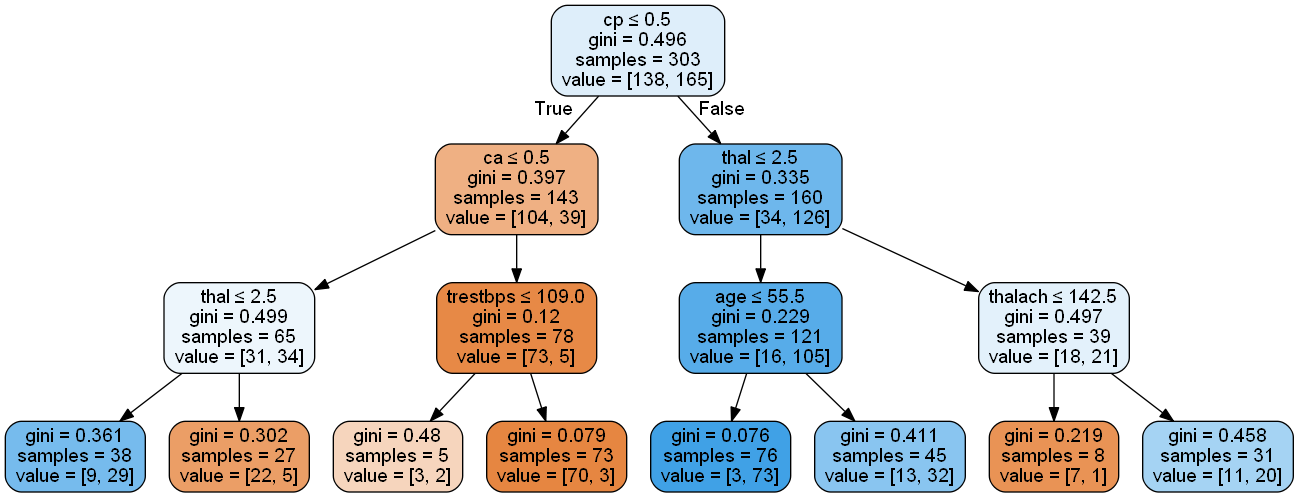

In [48]:
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)
clf.fit(X, y)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = list(data.columns[:-1]))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decisiontree1.png')
Image(graph.create_png())

#decision tree but used all features not "the bests"

# Support Vector Machine

In [38]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
best_features = SelectFromModel(LinearSVC())
best_features.fit(X, y)

transformedX = best_features.transform(X)
print(f"Old Shape: {X.shape}, New shape: {transformedX.shape}")

Old Shape: (303, 13), New shape: (303, 6)


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [39]:
cv = KFold(n_splits=10, shuffle=True, random_state=42) 

accuracies = []
for train, test in cv.split(transformedX):
  model =  LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
  model.fit(transformedX[train], y[train])

  scr = model.score(transformedX[test], y[test])
  accuracies.append(scr)

print(f"Mean of experiment scores: {np.mean(accuracies)}")

Mean of experiment scores: 0.8150537634408602


In [40]:
transformedX #sex,cp,exang,oldpeak,thal,ca

array([[1. , 3. , 0. , 2.3, 0. , 1. ],
       [1. , 2. , 0. , 3.5, 0. , 2. ],
       [0. , 1. , 0. , 1.4, 0. , 2. ],
       ...,
       [1. , 0. , 0. , 3.4, 2. , 3. ],
       [1. , 0. , 1. , 1.2, 1. , 3. ],
       [0. , 1. , 0. , 0. , 1. , 2. ]])

In [41]:
X.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2


# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
best_features = SelectFromModel(LogisticRegression())
best_features.fit(X, y)

transformedX = best_features.transform(X)
print(f"Old Shape: {X.shape}, New shape: {transformedX.shape}")
#new size is 7

Old Shape: (303, 13), New shape: (303, 7)


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
cv = KFold(n_splits=10, shuffle=True, random_state=42) 

accuracies = []
for train, test in cv.split(transformedX):
  model = LogisticRegression(max_iter=100)
  model.fit(transformedX[train], y[train])

  scr = model.score(transformedX[test], y[test])
  accuracies.append(scr)

print(f"Mean of experiment scores: {np.mean(accuracies)}")

Mean of experiment scores: 0.8349462365591398


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [44]:
transformedX #sex,cp,exang,slope,ca,thal,oldpeak

array([[1., 3., 0., ..., 0., 0., 1.],
       [1., 2., 0., ..., 0., 0., 2.],
       [0., 1., 0., ..., 2., 0., 2.],
       ...,
       [1., 0., 0., ..., 1., 2., 3.],
       [1., 0., 1., ..., 1., 1., 3.],
       [0., 1., 0., ..., 1., 1., 2.]])

In [45]:
transformedX[301]

array([1. , 0. , 1. , 1.2, 1. , 1. , 3. ])

In [46]:
X.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2


# KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

parameters = [{'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}]
clf = KNeighborsClassifier()
Grid1 = GridSearchCV(clf, parameters, cv=4)
Grid1.fit(transformedX, y)

Grid1.best_estimator_

scores = Grid1.cv_results_
scores['mean_test_score']
#best is 10 with auto

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


array([0.77227723, 0.76237624, 0.80528053, 0.78547855, 0.81188119,
       0.81518152, 0.85148515, 0.84488449, 0.8349835 , 0.82508251,
       0.83828383, 0.84158416, 0.8349835 , 0.8349835 , 0.83828383,
       0.82838284, 0.76237624, 0.76237624, 0.81188119, 0.78877888,
       0.81188119, 0.81188119, 0.84488449, 0.84818482, 0.83168317,
       0.82838284, 0.8349835 , 0.8349835 , 0.82508251, 0.82508251,
       0.82508251, 0.81848185, 0.77227723, 0.76237624, 0.80528053,
       0.78547855, 0.81188119, 0.81518152, 0.85148515, 0.84488449,
       0.8349835 , 0.82508251, 0.83828383, 0.84158416, 0.8349835 ,
       0.8349835 , 0.83828383, 0.82838284, 0.76237624, 0.7689769 ,
       0.82178218, 0.77887789, 0.82508251, 0.83168317, 0.85148515,
       0.84158416, 0.83168317, 0.83168317, 0.8349835 , 0.8349835 ,
       0.83168317, 0.82508251, 0.82838284, 0.81848185])

In [48]:
cv = KFold(n_splits=10, shuffle=True, random_state=42) 

accuracies = []
for train, test in cv.split(transformedX):
  model =  KNeighborsClassifier(n_neighbors=10, algorithm="auto")
  model.fit(transformedX[train], y[train])

  scr = model.score(transformedX[test], y[test])
  accuracies.append(scr)

print(f"Mean of experiment scores: {np.mean(accuracies)}")
#Logistic Regression's features are used. Because it is the only one that gave the highest accuracy. 10 is the best choice for 
#n_neighbors

Mean of experiment scores: 0.8317204301075268


# Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB

cv = KFold(n_splits=10, shuffle=True, random_state=42) 

accuracies = []
for train, test in cv.split(transformedX):
  model =  GaussianNB()
  model.fit(transformedX[train], y[train])

  scr = model.score(transformedX[test], y[test])
  accuracies.append(scr)

print(f"Mean of experiment scores: {np.mean(accuracies)}")

Mean of experiment scores: 0.8186021505376344
